In [1]:
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
file_path = "../Data/MachineLearningRating_v3.txt"

df = pd.read_csv(file_path, sep='|', low_memory=False)

In [3]:
# Convert 'TransactionMonth' to datetime object
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Handle missing values if any (replace with appropriate strategy)
# For simplicity, we'll fill missing values with 'Not specified'
df.fillna('Not specified', inplace=True)

# Feature Selection and KPI
# -------------------------

# We'll use 'TotalClaims' as the KPI to measure risk
# Features to test: Province, PostalCode, Gender, VehicleType, make

# Selected Features for Analysis
selected_features = ['Province', 'PostalCode', 'Gender', 'VehicleType', 'make']


C:\Users\huawei\AppData\Local\Temp\ipykernel_2732\279243953.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not specified' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Not specified', inplace=True)


In [4]:
# Hypothesis Testing
# ------------------

def test_hypothesis(group_a, group_b, feature, kpi):
    """
    Performs a two-sample t-test to compare the means of two groups.

    Args:
      group_a: Data for group A.
      group_b: Data for group B.
      feature: Feature being tested.
      kpi: Key performance indicator.

    Returns:
      p-value from the t-test.
    """

    # Perform t-test
    p_value = stats.ttest_ind(group_a[kpi], group_b[kpi]).pvalue

    print(f"Hypothesis Test for {feature}:")
    print(f"  - p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  - Reject the null hypothesis: There is a significant difference in risk.")
    else:
        print("  - Fail to reject the null hypothesis: No significant difference in risk found.")
    print("-" * 40)


In [5]:
#  Risk Differences Across Provinces

# Group data by province
provinces = df['Province'].unique()
for i in range(min(len(provinces), 10)):  
    for j in range(i + 1, len(provinces)):
        province_a = provinces[i]
        province_b = provinces[j]
        group_a = df[df['Province'] == province_a]
        group_b = df[df['Province'] == province_b]
        test_hypothesis(group_a, group_b, f"{province_a} vs. {province_b}", 'TotalClaims')


Hypothesis Test for Gauteng vs. KwaZulu-Natal:
  - p-value: 0.1928
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for Gauteng vs. Mpumalanga:
  - p-value: 0.0011
  - Reject the null hypothesis: There is a significant difference in risk.
----------------------------------------
Hypothesis Test for Gauteng vs. Eastern Cape:
  - p-value: 0.0398
  - Reject the null hypothesis: There is a significant difference in risk.
----------------------------------------
Hypothesis Test for Gauteng vs. Western Cape:
  - p-value: 0.0563
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for Gauteng vs. Limpopo:
  - p-value: 0.0325
  - Reject the null hypothesis: There is a significant difference in risk.
----------------------------------------
Hypothesis Test for Gauteng vs. North West:
  - p-value: 0.0000
  - Reject the null 

In [6]:
# Risk Difference Between Women and Men

# Group data by gender
group_female = df[df['Gender'] == 'Female']
group_male = df[df['Gender'] == 'Male']
test_hypothesis(group_female, group_male, "Female vs. Male", 'TotalClaims')

Hypothesis Test for Female vs. Male:
  - p-value: 0.8041
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------


In [7]:
# Risk Differences Across Vehicle Types

vehicle_types = df['VehicleType'].unique()
for i in range(min(len(vehicle_types), 10)):  
    for j in range(i + 1, len(vehicle_types)):
        vehicle_a = vehicle_types[i]
        vehicle_b = vehicle_types[j]
        group_a = df[df['VehicleType'] == vehicle_a]
        group_b = df[df['VehicleType'] == vehicle_b]
        test_hypothesis(group_a, group_b, f"{vehicle_a} vs. {vehicle_b}", 'TotalClaims')

Hypothesis Test for Passenger Vehicle vs. Medium Commercial:
  - p-value: 0.2188
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for Passenger Vehicle vs. Heavy Commercial:
  - p-value: 0.1581
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for Passenger Vehicle vs. Light Commercial:
  - p-value: 0.1828
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for Passenger Vehicle vs. Bus:
  - p-value: 0.5550
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for Passenger Vehicle vs. Not specified:
  - p-value: 0.0000
  - Reject the null hypothesis: There is a significant difference in risk.
----------------------------------------
Hypothesis 

In [8]:
# Risk Differences Across Car Makes

car_makes = df['make'].unique()
for i in range(min(len(car_makes), 10)): 
    for j in range(i + 1, len(car_makes)):
        make_a = car_makes[i]
        make_b = car_makes[j]
        group_a = df[df['make'] == make_a]
        group_b = df[df['make'] == make_b]
        test_hypothesis(group_a, group_b, f"{make_a} vs. {make_b}", 'TotalClaims')

Hypothesis Test for MERCEDES-BENZ vs. VOLKSWAGEN:
  - p-value: 0.5293
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for MERCEDES-BENZ vs. RENAULT:
  - p-value: 0.7779
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for MERCEDES-BENZ vs. FORD:
  - p-value: 0.6637
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for MERCEDES-BENZ vs. BMW:
  - p-value: 0.6401
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for MERCEDES-BENZ vs. AUDI:
  - p-value: 0.0901
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------
Hypothesis Test for MERCEDES-BENZ vs. VOLVO:
  - p-value: 0.68

<Figure size 1000x600 with 0 Axes>

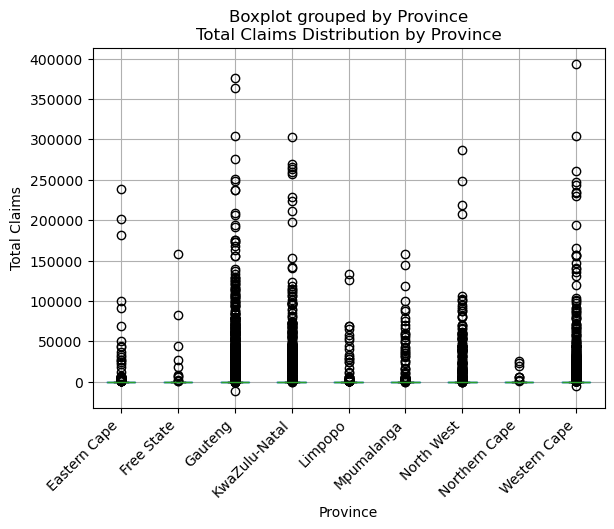

<Figure size 1000x600 with 0 Axes>

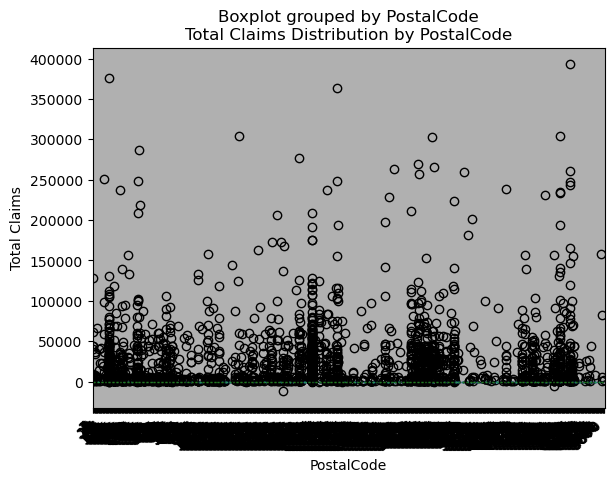

<Figure size 1000x600 with 0 Axes>

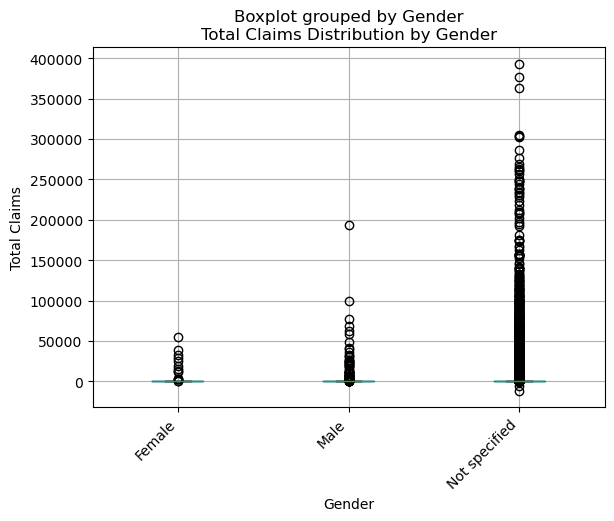

<Figure size 1000x600 with 0 Axes>

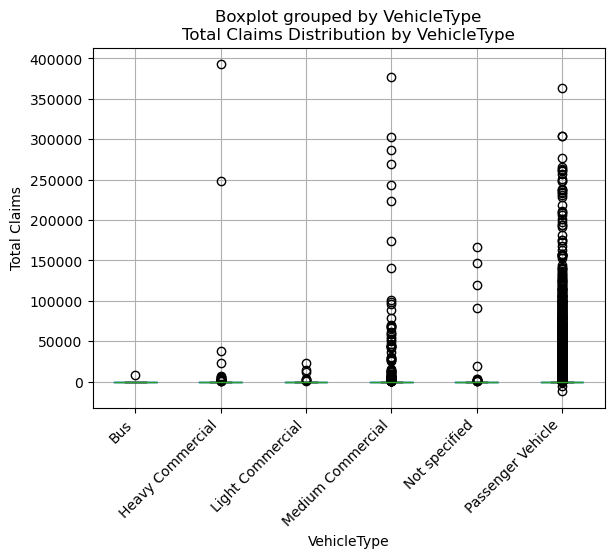

<Figure size 1000x600 with 0 Axes>

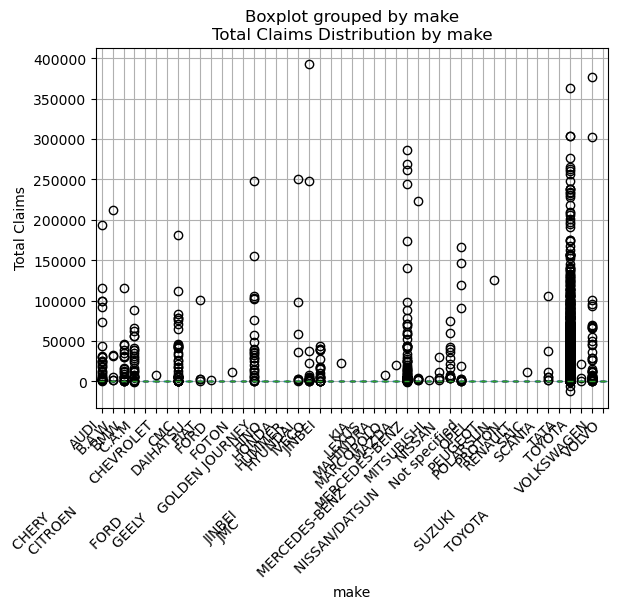

In [9]:
for feature in selected_features:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    df.boxplot(column='TotalClaims', by=feature)
    plt.title(f'Total Claims Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Total Claims')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.show()

Hypothesis Test for Female vs. Male:
  - p-value: 0.8041
  - Fail to reject the null hypothesis: No significant difference in risk found.
----------------------------------------


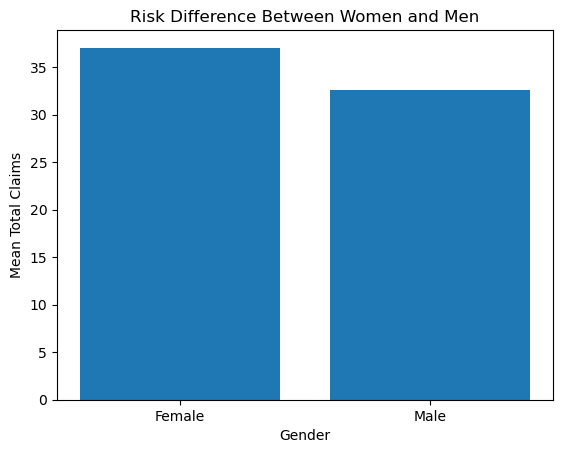

In [10]:
# Group data by gender
group_female = df[df['Gender'] == 'Female']
group_male = df[df['Gender'] == 'Male']
test_hypothesis(group_female, group_male, "Female vs. Male", 'TotalClaims')

# Calculate mean TotalClaims for each gender
mean_female = group_female['TotalClaims'].mean()
mean_male = group_male['TotalClaims'].mean()

# Create a bar plot to visualize the risk difference
plt.bar(['Female', 'Male'], [mean_female, mean_male])
plt.title('Risk Difference Between Women and Men')
plt.xlabel('Gender')
plt.ylabel('Mean Total Claims')
plt.show()